In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import time
import matplotlib.pyplot as plt
import math
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, r2_score

In [2]:
data = pd.read_csv('../../data/train_dataset_train.csv')

In [3]:
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [4]:
data.isnull().sum()

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [5]:
len(data.copy())

1091021

In [6]:
len(data)

1091021

In [7]:
data['ticket_type_nm'].unique()

array(['Пропуск FacePay', 'СК учащегося 30 дней',
       'БСК дружинника г.Москвы', '30 дней', 'КОШЕЛЕК',
       'СК студента 30 дней', '90 дней', '90 дней ЕДИНЫЙ ТК',
       '30 дней СК учащегося', '90 дней СК студента',
       '30 дней СК студента', 'ББК', 'СК аспиранта 90 дней',
       'Социальная карта москвича', '30 дней ЕДИНЫЙ ТК',
       'Социальная карта жителя Моск. области', '30 дней Пригород ТК',
       'Социальная карта москвича с сопровождающим',
       'Пропуск сотрудника УВД по охране Метрополитена',
       '60 поездок ЕДИНЫЙ ТК', 'СК для сотрудника ГУВД г.Москвы',
       '365 дней ЕДИНЫЙ ТК', 'ВЕСБ МОСКВА (7мин)', 'СК студента 90 дней',
       '90 дней Пригород ТК', '30 дней  Пригород', '365 дней Пригород ТК',
       '365 дней', 'СК ординатора 30 дней', '30 дней СК аспиранта',
       '30 дней СК ординатора', '90 дней СК ординатора',
       'ВЕСБ МО (7 мин)', 'ВЕСБ МО (тип 5)', 'СК ординатора 90 дней',
       'СК аспиранта 30 дней', '90 дней СК учащегося',
       'Времен

In [8]:
type_of_ticket = {'student':['СК учащегося 30 дней', 'СК студента 30 дней', '30 дней СК учащегося', '90 дней СК студента', 
                            '30 дней СК студента', 'СК аспиранта 90 дней', 'СК студента 90 дней', 'СК ординатора 30 дней',
                            '30 дней СК аспиранта', '30 дней СК ординатора', '90 дней СК ординатора', 'СК ординатора 90 дней',
                            'СК аспиранта 30 дней', '90 дней СК учащегося', 'СК учащегося 90 дней', '90 дней СК аспиранта', 
                            'СК ассистента-стажера 30 дней', 'СК ассистента-стажера 90 дней', '30 дней СК ассистента-стажера'],
                   'worker1':['30 дней', '30 дней ЕДИНЫЙ ТК'],
                  'worker2':['БСК дружинника г.Москвы', 'СК для сотрудника ГУВД г.Москвы', 'Безналичная транспортная карта', 'ББК', 'Пропуск FacePay', 'КОШЕЛЕК'],
                  'worker3':['365 дней ЕДИНЫЙ ТК','365 дней', '60 поездок ЕДИНЫЙ ТК', '90 дней', '90 дней ЕДИНЫЙ ТК',],
                  'benefit':['Социальная карта москвича', 'Социальная карта жителя Моск. области', 'Социальная карта москвича с сопровождающим',
                            'ВЕСБ МОСКВА (7мин)', 'ВЕСБ МО (7 мин)', 'ВЕСБ МО (тип 5)', 'Социальная карта жителя Моск. области с сопровождающим',
                            'ВЕСБ МОСКВА', 'ВЛБ МОСКВА', 'ВЕСБ МО с сопровождающим', 'ВЕСБ МО (тип 6)'],
                   'suburb':['30 дней Пригород ТК', '90 дней Пригород ТК', '30 дней  Пригород', '365 дней Пригород ТК', '90 дней  Пригород',
                            '365 дней  Пригород', 'Временный билет ММ', '3 суток Единый ТК', '1 сутки ЕДИНЫЙ ТК', 'Ультралайт Единый (70)', '1 сутки Пригород ТК', 'Билет 3 суток ЕДИНЫЙ',
                            'Билет 1 сутки ЕДИНЫЙ'],
                  'workerM':['Пропуск сотрудника УВД по охране Метрополитена', 'Пропуск сотрудника  метрополитена', 'Пропуск руководителя метрополитена',
                            'Пропуск  сотрудника МЦК']}
                

In [9]:
key = list(type_of_ticket.keys())

In [10]:
type_of_ticket[key[3]]

['365 дней ЕДИНЫЙ ТК',
 '365 дней',
 '60 поездок ЕДИНЫЙ ТК',
 '90 дней',
 '90 дней ЕДИНЫЙ ТК']

In [11]:
for i in range(len(key)):
    data.loc[data['ticket_type_nm'].isin(type_of_ticket[key[i]]), 'ticket_type_nm'] = key[i]

In [12]:
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,worker2,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,student,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,worker2,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,worker1,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,worker2,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


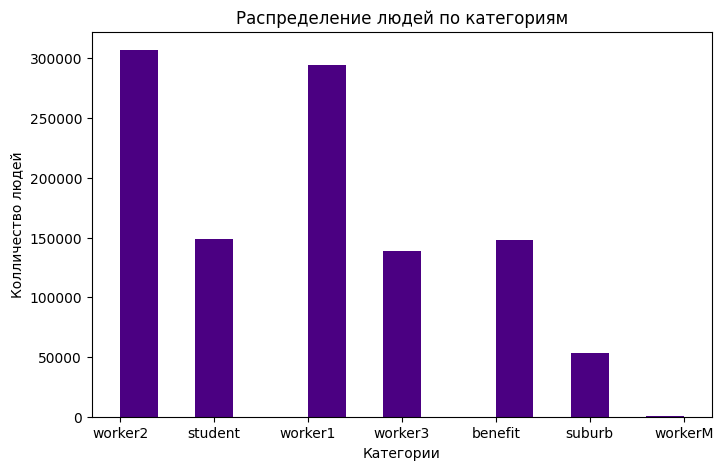

In [13]:
plt.figure(figsize=(8,5))
plt.hist(data.ticket_type_nm, bins=15, color='indigo')
plt.xlabel('Категории')
plt.ylabel('Колличество людей')
plt.title('Распределение людей по категориям');

In [14]:
data['ticket_type_nm'].unique()

array(['worker2', 'student', 'worker1', 'worker3', 'benefit', 'suburb',
       'workerM'], dtype=object)

In [15]:
data['pass_dttm'] = pd.to_datetime(data['pass_dttm'])

In [16]:
data['time'] = data['pass_dttm'].apply(lambda x: float(x.hour) + float(x.minute)/60)
data['time'] 

0          5.000000
1          5.000000
2          5.000000
3          5.016667
4          5.033333
             ...   
1091016    2.900000
1091017    3.100000
1091018    3.283333
1091019    3.383333
1091020    4.166667
Name: time, Length: 1091021, dtype: float64

In [17]:
data[2] = data['time'].apply(lambda x: float(12/math.pi)*math.cos(math.pi/12*x))
data[3] = data['time'].apply(lambda x: float(12/math.pi)*math.sin(math.pi/12*x))
data[[2, 3]]

,2,3
0,0.988616,3.689565
1,0.988616,3.689565
2,0.988616,3.689565
3,0.972508,3.693843
4,0.956381,3.698052
...,...,...
1091016,2.770726,2.629321
1091017,2.629321,2.770726
1091018,2.493359,2.893685
1091019,2.416756,2.957962


In [18]:
h_station = FeatureHasher(n_features=20, input_type='string')
hashed_Feature = h_station.fit_transform(data['station_nm'])
hashed_Feature = hashed_Feature.toarray()
data = pd.concat([data, pd.DataFrame(hashed_Feature)], axis=1)

h_line = FeatureHasher(n_features=10, input_type='string')
hashed_Feature = h_line.fit_transform(data['line_nm'])
hashed_Feature = hashed_Feature.toarray()
data = pd.concat([data, pd.DataFrame(hashed_Feature)], axis=1)

In [19]:
data = data.drop(['station_nm', 'line_nm'], axis=1)

In [20]:
data

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,line_id,pass_dttm,time_to_under,label,...,0,1,2,3,4,5,6,7,8,9
0,1,40BD89EC85646EFB69E283F39C298E60,worker2,2402,Лефортово БКЛ,11007,11,2022-09-12 05:00:13,216.316667,8001,...,2.0,0.0,1.0,1.0,-3.0,0.0,0.0,-2.0,1.0,1.0
1,2,126727A96489CC976A8C08E5CEB00542,student,110,Войковская ( Южный ),2006,2,2022-09-12 05:00:54,648.183333,9011,...,1.0,0.0,0.0,1.0,-2.0,0.0,1.0,-1.0,-1.0,1.0
2,3,D28CE6A9E0E5B6D213470A97CFF32485,worker2,110,Войковская ( Южный ),2006,2,2022-09-12 05:00:55,865.333333,7022,...,1.0,0.0,0.0,1.0,-2.0,0.0,1.0,-1.0,-1.0,1.0
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,worker1,110,Войковская ( Южный ),2006,2,2022-09-12 05:01:13,1048.233333,2022,...,1.0,0.0,0.0,1.0,-2.0,0.0,1.0,-1.0,-1.0,1.0
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,worker2,110,Войковская ( Южный ),2006,2,2022-09-12 05:02:55,965.600000,2017,...,1.0,0.0,0.0,1.0,-2.0,0.0,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,worker2,2283,Нижегородская (второй),15005,15,2022-09-19 02:54:50,124.750000,15005,...,-1.0,0.0,0.0,1.0,-2.0,0.0,0.0,-1.0,-1.0,0.0
1091017,1091018,141174B366F14A8703903813A49374DB,worker2,278,Калужская (Северный),6007,6,2022-09-19 03:06:02,56.066667,6007,...,-1.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,2.0
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,worker2,118,Каширская (Северный ),2010,2,2022-09-19 03:17:00,91.283333,2010,...,1.0,0.0,0.0,1.0,-2.0,0.0,1.0,-1.0,-1.0,1.0
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,worker2,2452,Воронцовская (Первый),11014,11,2022-09-19 03:23:30,47.900000,11014,...,2.0,0.0,1.0,1.0,-3.0,0.0,0.0,-2.0,1.0,1.0


In [21]:
h_station = FeatureHasher(n_features=7, input_type='string')
hashed_Feature = h_station.fit_transform(data['ticket_type_nm'])
hashed_Feature = hashed_Feature.toarray()
data = pd.concat([data, pd.DataFrame(hashed_Feature)], axis=1)

In [22]:
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,line_id,pass_dttm,time_to_under,label,...,7,8,9,0,1,2,3,4,5,6
0,1,40BD89EC85646EFB69E283F39C298E60,worker2,2402,Лефортово БКЛ,11007,11,2022-09-12 05:00:13,216.316667,8001,...,-2.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,-2.0
1,2,126727A96489CC976A8C08E5CEB00542,student,110,Войковская ( Южный ),2006,2,2022-09-12 05:00:54,648.183333,9011,...,-1.0,-1.0,1.0,0.0,-2.0,2.0,0.0,1.0,-2.0,0.0
2,3,D28CE6A9E0E5B6D213470A97CFF32485,worker2,110,Войковская ( Южный ),2006,2,2022-09-12 05:00:55,865.333333,7022,...,-1.0,-1.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,-2.0
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,worker1,110,Войковская ( Южный ),2006,2,2022-09-12 05:01:13,1048.233333,2022,...,-1.0,-1.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,-3.0
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,worker2,110,Войковская ( Южный ),2006,2,2022-09-12 05:02:55,965.600000,2017,...,-1.0,-1.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,-2.0


In [23]:
Y = data[['time_to_under']]
X = data.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm', 'pass_dttm', 'time', 'station_id', 'line_id', 'time_to_under', 'label'], axis = 1)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)
r2 = r2_score(Y_test, Y_predict)
r2


0.48987684105360485

In [25]:
Y = data[['label']]
X = data.drop(['id', 'ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm', 'pass_dttm', 'time', 'station_id', 'line_id', 'time_to_under', 'label'], axis = 1)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)
recall = recall_score(Y_test, Y_predict, average='micro')
recall

C:\Users\svden\AppData\Local\Temp\ipykernel_5008\35374086.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


0.07935974482672231

In [27]:
result = 0.5 * r2 + 0.5 * recall
print('result: ' + str(result)) 

result: 0.2846182929401636
